# Introduction
Imagine you have to pull a large amount of data from internet as quickly as possible, instead of manually saving the data from websites, the web scraping software will automatically load and extract data from multiple websites as per your requirement.

Web scraping, also called web data mining or web harvesting, is the process of constructing an agent which can extract, parse, download and organize useful information from the web automatically

# Uses of Web Scraping

The uses and reasons for using web scraping are as endless as the uses of the World Wide Web. Web scrapers can do anything like ordering online food, scanning online shopping website for you and buying ticket of a match the moment they are available etc. just like a human can do. Some of the important uses of web scraping are discussed here −

+	E-commerce Websites − Web scrapers can collect the data specially related to the price of a specific product from various e-commerce websites for their comparison.

+	Content Aggregators − Web scraping is used widely by content aggregators like news aggregators and job aggregators for providing updated data to their users.

+	Marketing and Sales Campaigns − Web scrapers can be used to get the data like emails, phone number etc. for sales and marketing campaigns.

+	Search Engine Optimization (SEO) − Web scraping is widely used by SEO tools like SEMRush, Majestic etc. to tell business how they rank for search keywords that matter to them.

+	Data for Machine Learning Projects − Retrieval of data for machine learning projects depends upon web scraping.

+ Data for Research − Researchers can collect useful data for the purpose of their research work by saving their time by this automated process.


# Python Libraries for Web Scraping

**Requests:**

It is a simple python web scraping library. It is an efficient HTTP library used for accessing web pages. With the help of Requests, we can get the raw HTML of web pages which can then be parsed for retrieving the data.

**Urllib3:**
It is another Python library that can be used for retrieving data from URLs similar to the requests library. 

**Beautiful Soup:**

 BeautifulSoup is a Python library for pulling data out of HTML and XML files. It can be used with requests, because it needs an input (document or url) to create a soup object as it cannot fetch a web page by itself
 
**Selenium:** 
 Selenium is a web testing library. It is used to automate browser activities.
 
#  Steps in web scrabing
 
1. Find the URL that you want to scrape
2. Inspect Your Data Source
3. Find the data you want to extract
4. Scrape HTML Content From a Page
5. Parse HTML Code With Beautiful Soup
6. Extract the needed data from the HTML
7. Save the data as require

In [1]:
import requests
from bs4 import BeautifulSoup as soup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\pc\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [39]:
page = 1
bestseller_books = []
while page != 35:
    url = f"https://www.bookdepository.com/bestsellers?page={page}"
    response = requests.get(url)
    soupp= soup(response.content, "html5lib")      
    content=soupp.findAll("div", attrs={"class":"book-item"})  
    for row in content:
        dicv = {}
        try:
            dicv["Title"]=row.h3.a.get_text(strip=True)
        except:
            np.nan
        try:
            dicv["Price"]=row.find("p", {"class":"price"}).text.strip().split("$")[1].replace("\n", " ").replace("\xa0US", " ").strip()
        except:
            np.nan
        try:
            dicv["published_date"] =row.find("p", {"class":"published"}).get_text(strip=True)
        except:
            np.nan
        try:
            dicv["format"] = row.find("p", {"class":"format"}).get_text(strip=True)
        except:
            np.nan
        try:
            dicv["author_name"]= row.find("p", {"class": "author"}).get_text(strip=True)
        except:
            np.nan
        try:
            dicv["data-show-related"]= row.find("a", {"rel": "nofollow"}).get_text(strip=True)
        except:
            np.nan
        bestseller_books.append(dicv)
    page = page + 1    

In [69]:
# convert the list of the bestseller to df
bestseller_df=pd.DataFrame(bestseller_books)

In [70]:
# print the df of the bestseller
bestseller_df

,Title,Price,published_date,format,author_name,data-show-related
0,New License MARCH-A: Vol. 1 from Seven Seas En...,18.04,25 Oct 2022,Paperback,TBA,Pre-order
1,It Ends With Us: The most heartbreaking novel ...,13.74,02 Aug 2016,Paperback,Colleen Hoover,Add to basket
2,Verity,12.65,20 Jan 2022,Paperback,Colleen Hoover,Add to basket
3,Seven Husbands of Evelyn Hugo,13.92,14 Oct 2021,Paperback,Taylor Jenkins Reid,Add to basket
4,Ugly Love,13.48,21 Jan 2016,Paperback,Colleen Hoover,Add to basket
...,...,...,...,...,...,...
1015,The World Atlas of Coffee,38.99,04 Oct 2018,Hardback,James Hoffmann,Add to basket
1016,"Music Theory in Practice, Grade 2",11.08,01 May 2008,Sheet music,Eric Taylor,Add to basket
1017,Strange Weather in Tokyo,12.92,06 Aug 2020,Paperback,Hiromi Kawakami,Add to basket
1018,The Future is History,19.03,19 Oct 2017,Paperback,Masha Gessen,Add to basket


In [79]:
# store the bestseller df as csv
bestseller_df.to_csv("bestseller_books.csv", index=False)

In [80]:
# import the saved df and print the first five row
bestseller_books_df=pd.read_csv("bestseller_books.csv")
bestseller_books_df.head()

,Title,Price,published_date,format,author_name,data-show-related
0,New License MARCH-A: Vol. 1 from Seven Seas En...,18.04,25 Oct 2022,Paperback,TBA,Pre-order
1,It Ends With Us: The most heartbreaking novel ...,13.74,02 Aug 2016,Paperback,Colleen Hoover,Add to basket
2,Verity,12.65,20 Jan 2022,Paperback,Colleen Hoover,Add to basket
3,Seven Husbands of Evelyn Hugo,13.92,14 Oct 2021,Paperback,Taylor Jenkins Reid,Add to basket
4,Ugly Love,13.48,21 Jan 2016,Paperback,Colleen Hoover,Add to basket


# Data Cleaning and Exploration

In [81]:
# show the summary of the df
bestseller_books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1020 non-null   object 
 1   Price              1014 non-null   float64
 2   published_date     1020 non-null   object 
 3   format             1020 non-null   object 
 4   author_name        1009 non-null   object 
 5   data-show-related  1020 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.9+ KB


from the infomation above, the dataframe consist of 6 columns. I will change the published date from date object to datetime 

In [82]:
# convert the object date to datetime
bestseller_books_df["published_date"]=pd.to_datetime(bestseller_books_df["published_date"])

In [83]:
bestseller_books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              1020 non-null   object        
 1   Price              1014 non-null   float64       
 2   published_date     1020 non-null   datetime64[ns]
 3   format             1020 non-null   object        
 4   author_name        1009 non-null   object        
 5   data-show-related  1020 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 47.9+ KB


In [86]:
# check for duplicated record
bestseller_books_df.duplicated().sum()

2

The dataframe consist of 2 duplicate. I will filter them out

In [87]:
# drop the first duplicate
bestseller_books_df.drop_duplicates(  keep="first", inplace=True)

In [99]:
# check for missing values
bestseller_books_df.isna().sum()

Title                 0
Price                 6
published_date        0
format                0
author_name          11
data-show-related     0
dtype: int64

The Price and author name columns consist of missing values, i will check if there is reasoning for that

In [89]:
# price out when the Price is nan
bestseller_books_df[bestseller_books_df["Price"].isna()]

,Title,Price,published_date,format,author_name,data-show-related
77,Cursed Bunny,NaN,2021-07-15,Paperback,Bora Chung,Notify me
82,Australian Birds in Pictures,NaN,2021-11-05,Paperback,Matthew Jones,Notify me
91,Never Split the Difference,NaN,2018-06-29,Paperback,Chris Voss,Try AbeBooks
156,Blade Of The Immortal Deluxe Volume 5,NaN,2022-03-15,Hardback,Hiroaki Samura,Notify me
163,Disney Encanto: The Ultimate Colouring Book,NaN,2021-11-21,Paperback,Autumn Publishing,Notify me
596,CEO Excellence (Export),NaN,2022-03-15,Paperback,Carolyn Dewar,Notify me


The missing values might be as a result of the price not inputed in the on the web. i will the mean of the price then fill the nan will the result

In [100]:
# fill the missing values with mean
mean=bestseller_books_df["Price"].mean()
bestseller_books_df["Price"].fillna(mean, inplace=True)

In [101]:
bestseller_books_df[bestseller_books_df["author_name"].isnull()]

,Title,Price,published_date,format,author_name,data-show-related
67,"Jujutsu Kaisen, Vol. 1",14.84,2019-12-26,Paperback,NaN,Add to basket
120,Horizon Forbidden West Official Strategy Guide,43.32,2022-03-31,Hardback,NaN,Pre-order
208,The Batman: Before the Batman: an Original Mov...,26.12,2022-02-01,Paperback,NaN,Add to basket
546,"20th Century Boys: The Perfect Edition, Vol. 3",29.34,2019-04-04,Paperback,NaN,Add to basket
737,A Dictionary of Color Combinations,23.26,2011-03-17,Paperback,NaN,Add to basket
847,Genki 1 Third Edition,55.65,2020-03-02,Paperback,NaN,Add to basket
864,"Discovering Music Theory, The ABRSM Grade 4 Wo...",20.00,2020-10-08,Sheet music,NaN,Add to basket
867,Twisted Tales: Enchanted Collection (Disney),70.35,2021-08-01,Paperback,NaN,Add to basket
881,The Colour Monster,13.69,2016-03-01,Paperback,NaN,Add to basket
1008,The Little Mermaid (Disney Animated Classics),19.00,2019-01-24,Hardback,NaN,Add to basket


The missing values here can also be as a result of the list not inputed. I will drop all the missing values here

In [106]:
# drop all the missing values
bestseller_books_df.dropna(subset="author_name", inplace=True)

In [108]:
# recheck the missing values
bestseller_books_df.isna().sum()

Title                0
Price                0
published_date       0
format               0
author_name          0
data-show-related    0
dtype: int64

Now, that the df is clean, we can go on with EDA

In [112]:
# Extract the month and year from the date columns
bestseller_books_df["Month_Name"]= pd.to_datetime(bestseller_books_df["published_date"], format="%Y-%m-%d").dt.month_name()

In [113]:
# Extract the month and year from the date columns

bestseller_books_df["Years"]= pd.to_datetime(bestseller_books_df["published_date"], format="%Y-%m-%d").dt.year

In [114]:
bestseller_books_df.head()

,Title,Price,published_date,format,author_name,data-show-related,Month_Name,Years
0,New License MARCH-A: Vol. 1 from Seven Seas En...,18.04,2022-10-25,Paperback,TBA,Pre-order,October,2022
1,It Ends With Us: The most heartbreaking novel ...,13.74,2016-08-02,Paperback,Colleen Hoover,Add to basket,August,2016
2,Verity,12.65,2022-01-20,Paperback,Colleen Hoover,Add to basket,January,2022
3,Seven Husbands of Evelyn Hugo,13.92,2021-10-14,Paperback,Taylor Jenkins Reid,Add to basket,October,2021
4,Ugly Love,13.48,2016-01-21,Paperback,Colleen Hoover,Add to basket,January,2016


# Price columns

Text(0.5, 1.0, 'Distribution of Price')

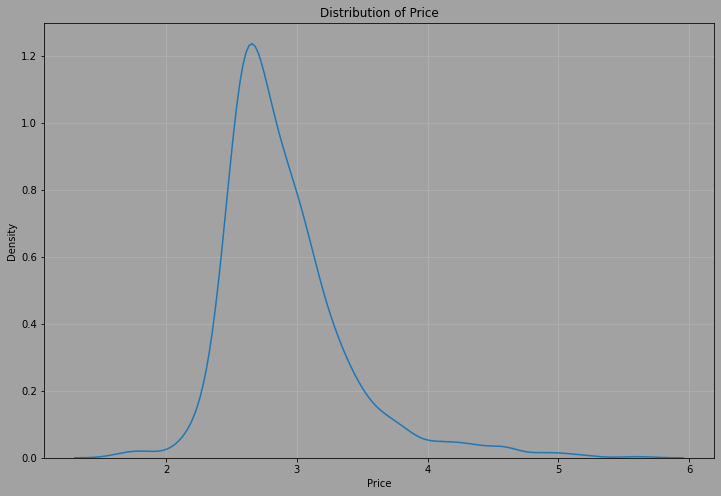

In [118]:
# plot a distribution graph to see the pattern is price column

fig, ax = plt.subplots(figsize=(12,8), facecolor=("#A2A2A2"))
ax.set_facecolor("#A2A2A2")
ax.grid(True)
sns.kdeplot(data=np.log(bestseller_books_df["Price"]), ax=ax).set_title("Distribution of Price")

# format Column
the format columns illustrate the type of the book

In [121]:
bestseller_books_df.format.value_counts().to_frame().reset_index()

,index,format
0,Paperback,791
1,Hardback,163
2,Board book,26
3,Cards,17
4,Book,3
5,Sheet music,3
6,Mixed media product,2
7,Novelty book,1
8,Game,1


In [205]:
format_eda=bestseller_books_df.groupby("format").agg({"published_date":"count", "Price":"mean"}).rename(
                    columns={"Price": "Average_Price", "published_date":"Count"})
format_eda= format_eda.sort_values(by=["Average_Price", "Count"],ascending=False)
format_eda

,Count,Average_Price
format,,
Novelty book,1,40.060000
Hardback,163,38.298817
Mixed media product,2,32.875000
Game,1,30.230000
Book,3,27.250000
Cards,17,23.149412
Paperback,791,17.901347
Board book,26,13.616154
Sheet music,3,11.866667


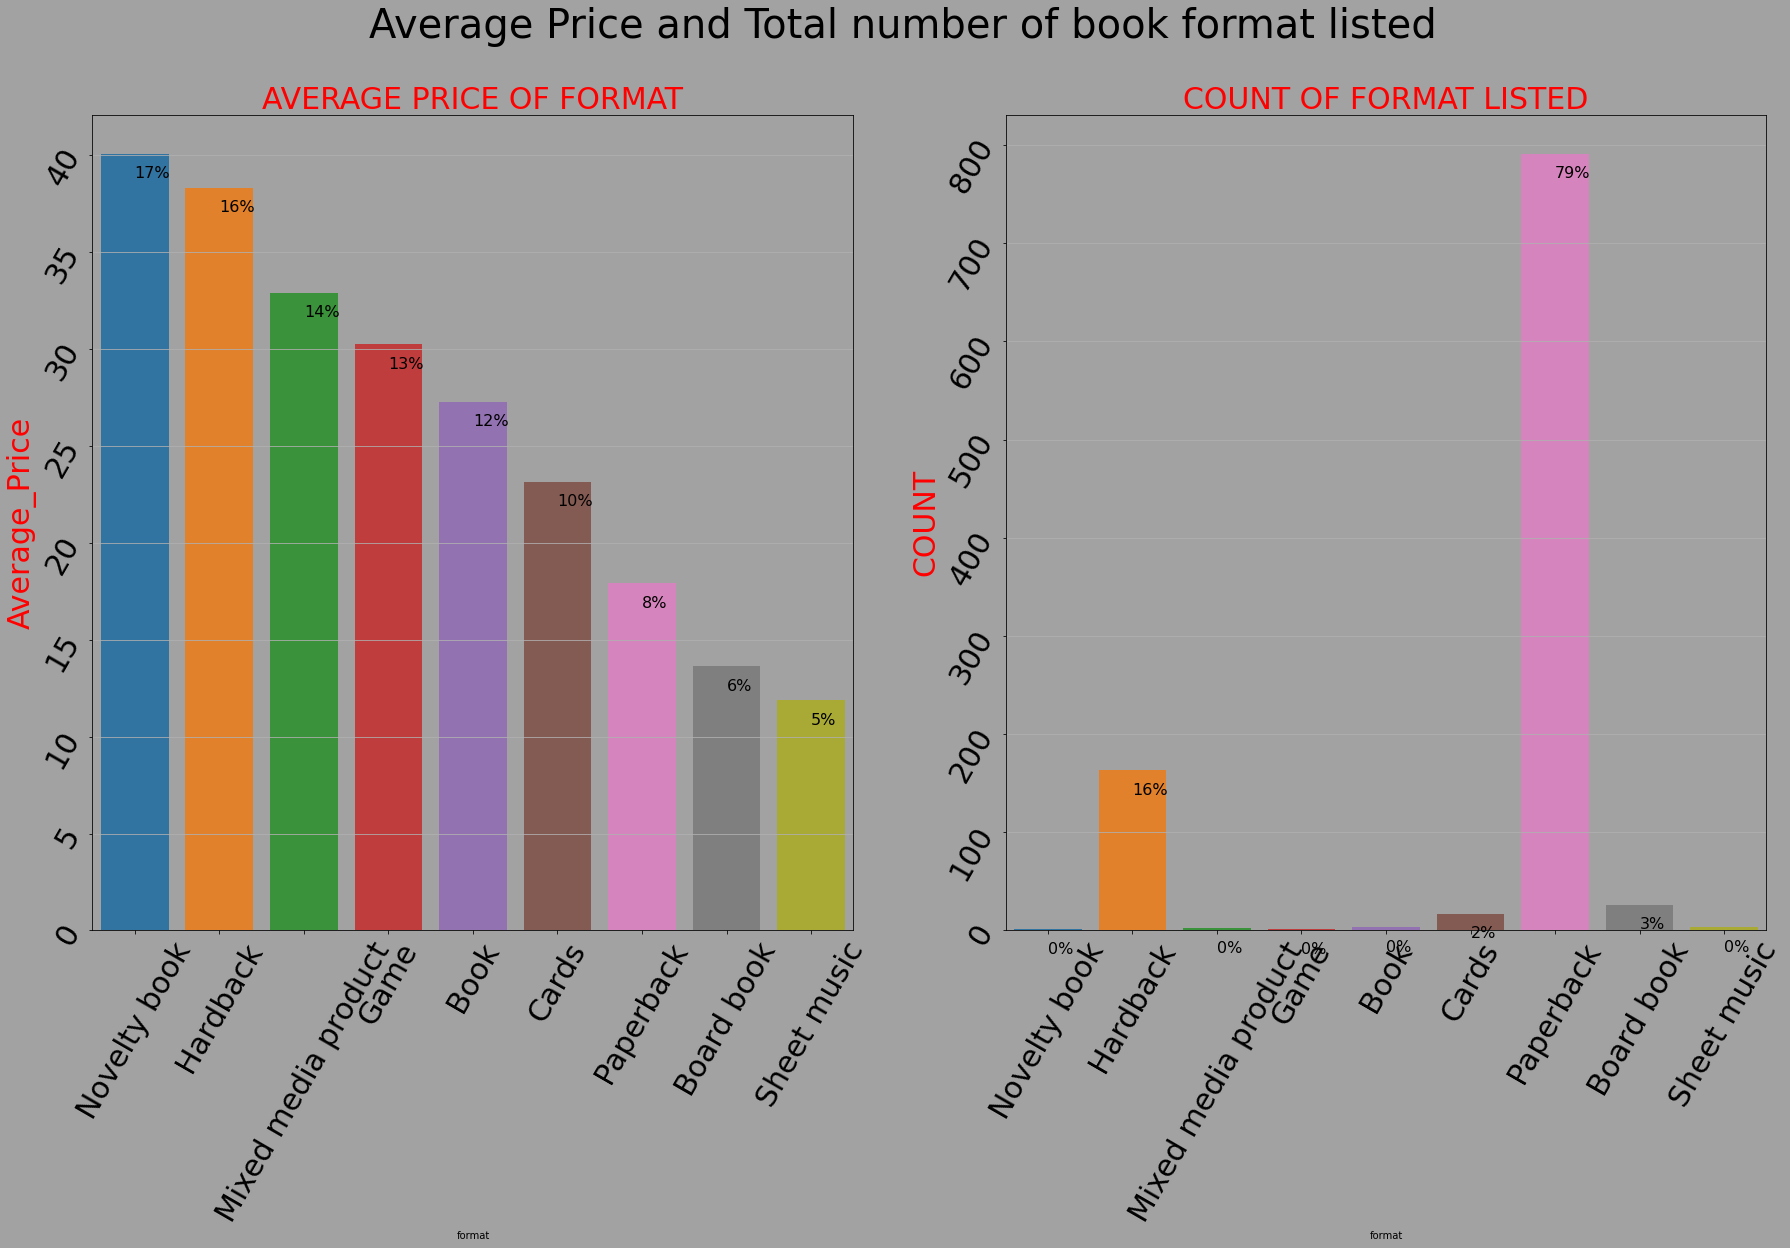

In [228]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,15), facecolor="#A2A2A2")
ax[1].set_facecolor("#A2A2A2")
ax[1].grid(True)
ax[0].set_facecolor("#A2A2A2")
ax[0].grid(True)
plot=sns.barplot(x=format_eda.index, y=format_eda.Count, ax=ax[1])
for p in plot.patches:
    plot.annotate( format(round(p.get_height()/ format_eda.Count.values.sum()*100), '.0f') +"%",

               (p.get_x() + p.get_width() / 2., p.get_height()),

               ha='left', va='top',
               size=16,
               xytext=(0, -12),
               textcoords='offset points')
    
plot=sns.barplot(x=format_eda.index, y=format_eda.Average_Price, ax=ax[0])
for p in plot.patches:
    plot.annotate( format(round(p.get_height()/ format_eda.Average_Price.values.sum()*100), '.0f') +"%",

               (p.get_x() + p.get_width() / 2., p.get_height()),

               ha='left', va='top',
               size=16,
               xytext=(0, -12),
               textcoords='offset points')
    
ax[0].tick_params(axis="x", labelcolor="black", labelrotation=60, labelsize=30)
ax[0].set_title("AVERAGE PRICE OF FORMAT", fontsize=30, color="red")
ax[1].set_title("COUNT OF FORMAT LISTED", fontsize=30, color="red")
ax[1].tick_params(axis="x", labelcolor="black", labelrotation=60, labelsize=30)
ax[1].tick_params(axis="y", labelcolor="black", labelrotation=60, labelsize=30)
ax[0].tick_params(axis="y", labelcolor="black", labelrotation=60, labelsize=30)
ax[0].set_ylabel("Average_Price", fontsize=30, color="red")
ax[1].set_ylabel("COUNT", fontsize=30, color="red")
fig.suptitle("Average Price and Total number of book format listed", fontsize=40)
plt.show()

The plot above shows the Average Price and the Total number of book format listed on www.bookdepository.com/bestsellers. 
paperback has the higest number of the listed book with 8% of total average Price

# Name of the Author

In [232]:
author_eda=bestseller_books_df.groupby("author_name").agg({"published_date":"count", "Price":"mean"}).rename(
                    columns={"Price": "Average_Price", "published_date":"Total_listed_book"})
author_eda= author_eda.sort_values(by=["Total_listed_book", "Average_Price"],ascending=False)
author_eda=author_eda[:10].sort_values(by=[ "Average_Price"],ascending=False)
author_eda

,Total_listed_book,Average_Price
author_name,,
Kentaro Miura,10,80.261000
Sarah J. Maas,14,33.740714
Brandon Sanderson,12,26.313333
Leigh Bardugo,8,22.851250
Mo Xiang Tong Xiu,8,19.253750
Colleen Hoover,14,15.978571
Koyoharu Gotouge,19,13.944211
Gege Akutami,11,13.180909
Tatsuki Fujimoto,11,12.212727


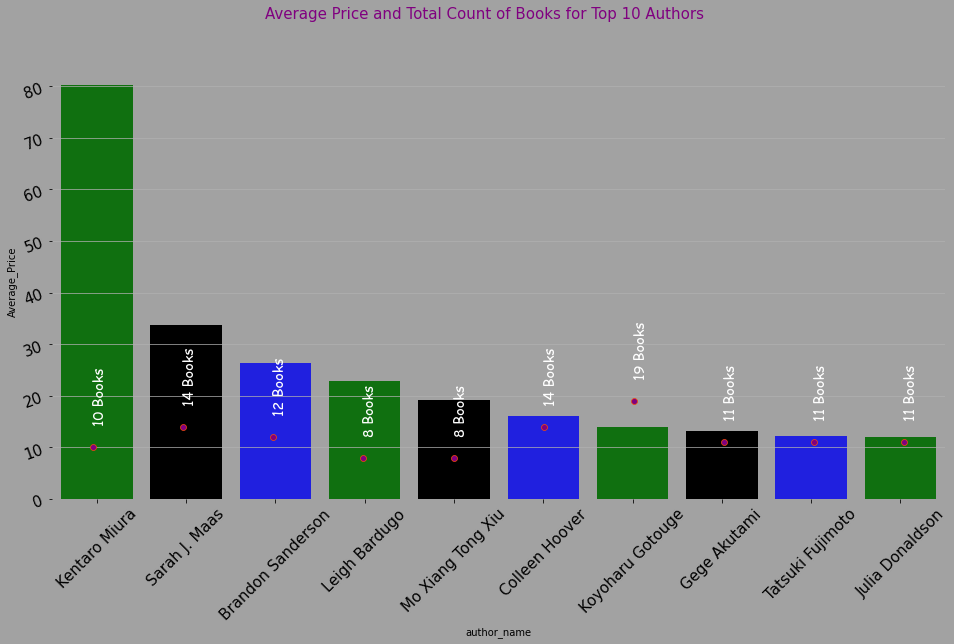

In [286]:
fig, ax = plt.subplots(figsize=(16,8), facecolor=("#A2A2A2"))
ax.grid(True, alpha=0.9)
ax.set_facecolor("#A2A2A2")

plot= sns.barplot(x=author_eda.index, y=author_eda.Average_Price, palette=["green", "black", "blue"],ax=ax)
ax2 = ax.twiny()
sns.lineplot(x =author_eda.index , y =author_eda.Total_listed_book , ax = ax2, marker = "o", linewidth = 0,
             color = "purple", markeredgecolor = "#F1480F")

ax2.axis("off")

for y, x in list(enumerate(author_eda.Total_listed_book)):
    ax2.text(y , x+5 ,  str(x) +" Books", color = "white", fontweight = "normal", rotation="vertical", family="cursive"
                               , size="x-large")
    
ax.tick_params(axis="x", labelrotation=45, labelcolor="black", labelsize=15)
ax.tick_params(axis="y", labelrotation=20, labelsize=15)
sns.despine(left = True, right = True, bottom = True, top = True)
fig.suptitle("Average Price and Total Count of Books for Top 10 Authors", fontsize=15, color="purple")
plt.show()

The plot above show the Average Price and the total number of book list on  www.bookdepository.com/bestsellers for top 10 author. The barplot represent the average Price while the dotline represent the total number of the books by each Author. Kentaro Miuraa has the highest Average Price(80.0 dollars) with 10 Books listed on www.bookdepository.com/bestsellers. Koyaharu Gotouge has the highest number of books(19) with average Price of $13.9. It can be deduce that the Price of book written by Koyaharu Gotouge is relatively cheap

In [ ]:
format_eda=bestseller_books_df.groupby(["format", "author_name"]).agg({"published_date":"count", "Price":"mean"}).rename(
                    columns={"Price": "Average_Price", "published_date":"Count"})
format_eda= format_eda.sort_values(by=["Average_Price", "Count"],ascending=False)
format_eda

In [305]:
author_eda=bestseller_books_df.groupby(["author_name", "format"], as_index=False).agg({"published_date":"count", "Price":"mean"})#.rename(
                    ##columns={"Price": "Average_Price", "published_date":"Total_listed_book"})
#author_eda= author_eda.sort_values(by=["Total_listed_book", "Average_Price"],ascending=False)
#author_eda=author_eda[:10].sort_values(by=[ "Average_Price"],ascending=False)
author_eda.sort_values(by=["published_date"],ascending=False).head(20)

,author_name,format,published_date,Price
364,Koyoharu Gotouge,Paperback,19,13.944211
127,Colleen Hoover,Paperback,13,15.827692
582,Sarah J. Maas,Paperback,12,34.492500
230,Gege Akutami,Paperback,11,13.180909
640,Tatsuki Fujimoto,Paperback,11,12.212727
329,Julia Donaldson,Paperback,10,11.677000
353,Kentaro Miura,Hardback,10,80.261000
641,Tatsuya Endo,Paperback,8,11.970000
446,Mo Xiang Tong Xiu,Paperback,8,19.253750
29,Alice Oseman,Paperback,8,15.941250


In [299]:
author_eda.groupby("format")

,author_name,format,published_date,Price
29,Alice Oseman,Paperback,8,15.94125


,Title,Price,published_date,format,author_name,data-show-related,Month_Name,Years
261,Loveless,14.88,2020-07-20,Paperback,Alice Oseman,Add to basket,July,2020
370,Radio Silence,13.66,2016-02-25,Paperback,Alice Oseman,Add to basket,February,2016
375,Heartstopper Volume One,19.10,2019-04-10,Paperback,Alice Oseman,Add to basket,April,2019
376,Heartstopper Volume Four,17.94,2021-05-13,Paperback,Alice Oseman,Add to basket,May,2021
414,Heartstopper Volume Two,16.75,2019-12-20,Paperback,Alice Oseman,Add to basket,December,2019
602,Solitaire,15.48,2014-07-31,Paperback,Alice Oseman,Add to basket,July,2014
614,Heartstopper Volume Three,17.85,2020-02-06,Paperback,Alice Oseman,Add to basket,February,2020
844,Nick and Charlie,11.87,2020-08-06,Paperback,Alice Oseman,Add to basket,August,2020


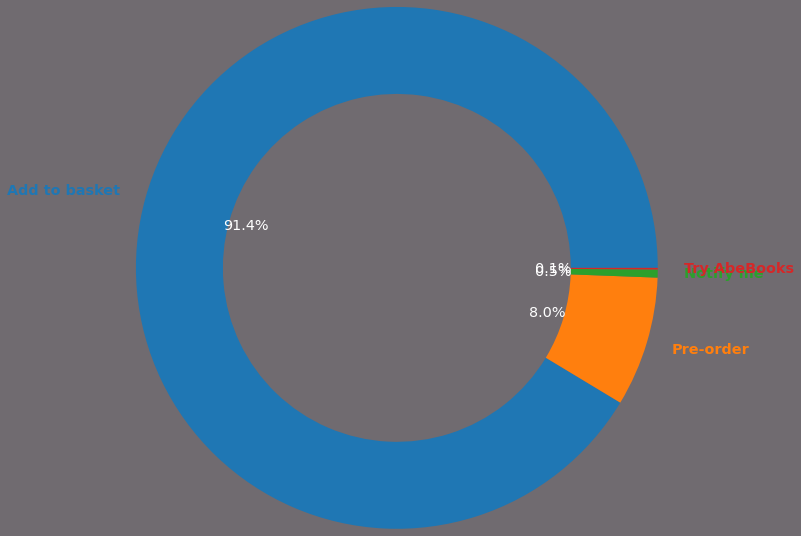

In [359]:
data_show_related_eda=bestseller_books_df['data-show-related'].value_counts()
fig, ax = plt.subplots(figsize=(16,8), facecolor=("#706B70"))
ax.set_facecolor=("#706B70")
patches, texts, pcts=ax.pie(x=data_show_related_eda.values, wedgeprops=dict(width=0.5), radius=1.5,
                               labels=data_show_related_eda.index, textprops={'size': 'x-large'} , autopct='%.1f%%',
                              )

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.text(s="", x=-1.6, y=1.8,color="red",fontsize=20)
for i, patches in enumerate(patches):
    texts[i].set_color(patches.get_facecolor())

In [368]:
published_month_eda=bestseller_books_df.Month_Name.value_counts().to_frame().reset_index().rename(
                                                        columns={"index":"published_month", "Month_Name":"Count_of_Book"})
published_month_eda

,published_month,Count_of_Book
0,March,153
1,October,110
2,January,96
3,September,88
4,April,87
5,February,80
6,May,80
7,June,72
8,July,71
9,November,63


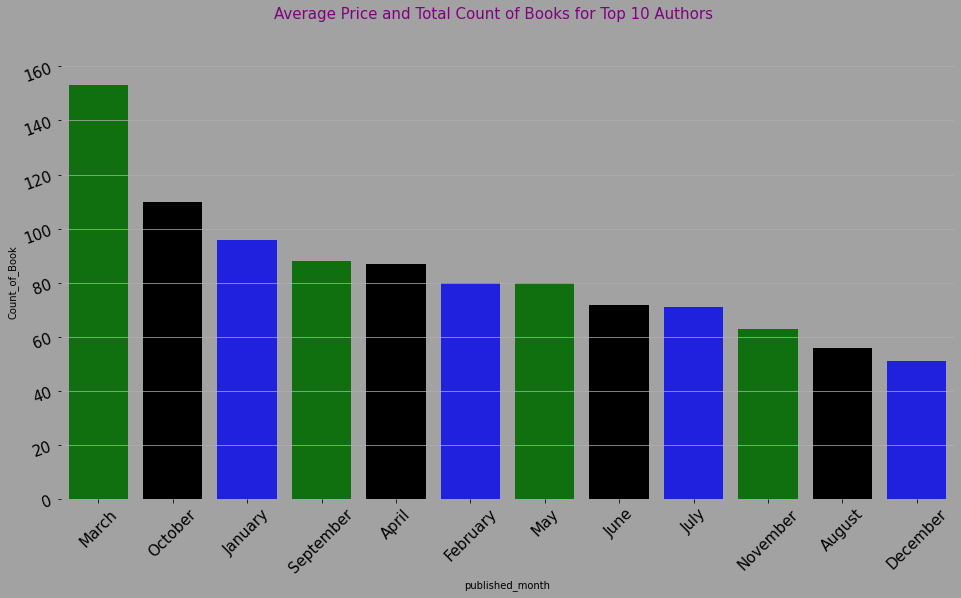

In [370]:
fig, ax = plt.subplots(figsize=(16,8), facecolor=("#A2A2A2"))
ax.grid(True, alpha=0.9)
ax.set_facecolor("#A2A2A2")

plot= sns.barplot(x=published_month_eda.published_month, y=published_month_eda.Count_of_Book, 
                  palette=["green", "black", "blue"],ax=ax)

    
ax.tick_params(axis="x", labelrotation=45, labelcolor="black", labelsize=15)
ax.tick_params(axis="y", labelrotation=20, labelsize=15)
sns.despine(left = True, right = True, bottom = True, top = True)
fig.suptitle("The published month of the Books listed", fontsize=15, color="purple")
plt.show()

From the plot above, it can be seen that most of the most listed on  www.bookdepository.com/bestsellers were published on march 

In [383]:
bestseller_books_df.groupby("Years").agg({"published_date": "count" , "Price":"mean"}).rename(columns={"Price":"average_Price", "published_date": "Number_of_Books"}).sort_values(by=["average_Price"],
                                                                  ascending=False)

,Number_of_Books,average_Price
Years,,
2022,243,24.579277
2021,193,22.911821
2020,120,22.745500
2019,67,20.982537
2014,20,20.518000
1999,1,20.300000
2000,6,19.566667
2018,77,19.404119
2023,1,19.350000
